# Problem Description

In [83]:
"""
Binary Text Classification between True and Fake News.

Dataset: https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset

"""

'\nBinary Text Classification between True and Fake News.\n\nDataset: https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset\n\n'

In [84]:
import pandas as pd 
import numpy
import seaborn as sns
import matplotlib.pyplot as plt
import string
import statistics
import re


from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import CountVectorizer




import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords


#Print Options
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

# Read Data

In [85]:
#Reading Data

df_true = pd.read_csv("../data/True.csv")
df_fake = pd.read_csv("../data/Fake.csv")


In [86]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [87]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


# Data Cleaning

In [88]:
#Add column y to label each row into a particular class i.e. True/Fake, this coulumn would act as class label
df_true['y'] = 0 # 0 - True
df_fake['y'] = 1 # 1 - Fake



In [89]:
#Combine into one main dataframe
df = pd.concat([df_true,df_fake], ignore_index = True)
df.head()

,title,text,subject,date,y
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


## General Data Check

In [90]:
#Get General Info about the data

df.info()

'''
Conclusion: General data seems consistent as no obvious problems are visible, needs more indepth analysis
'''



#Check Duplicates

d_data = df['text'].duplicated()
df.loc[d_data].shape

'''
Conclusion: around 6252 rows of data are duplicates
'''


#Dropping Duplicates
df = df.drop_duplicates('text', keep='last')
df.reset_index(drop=True)





#Check Missing Values
df.isnull().sum()

'''
Conclusion: No values are Missing
'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   y        44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


'\nConclusion: No values are Missing\n'

### Clean Date Column

In [91]:
'''
# Correct Date Data

Date coulumn would be important for data exploration, 
thus need to make sure its format is consistent and their is no noise present in the feature


'''


# Check for anamoly
#print(df['date'].unique())


'''
Conclusion:
- It can be noticed that there is  is white space in each value need to remove it
- It can be noticed that some values are not dates and can be considered noise 
'''





# Remove Whitespace
df['date'] = df['date'].str.strip()








# Remove rows where date is corrupted
# - Make Months in simillar format so dates and noise can be filtered out later
original_month = ['January','February','March','April','May','June','July','August','September','October','November','December']
new_month = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for i in range(0,12):
    df['date'] = df['date'].str.replace(original_month[i],new_month[i])



# - Check length and remove rows which have more characters than regular date data
#print(df[df['date'].str.len() >12])
df.drop(df[df['date'].str.len() >12].index, inplace=True)
df['date']








#Convert to date_time object

df['date'] = df['date'].apply(lambda x: pd.to_datetime(x).strftime('%d/%m/%Y'))


'''
Conclusion: Now all the dates are DataTime Objects and follow consistent %d/%m/%Y format 
'''




'\nConclusion: Now all the dates are DataTime Objects and follow consistent %d/%m/%Y format \n'

## Data Exploration

In [92]:
df.columns

Index(['title', 'text', 'subject', 'date', 'y'], dtype='object')

### Is the amount of fake data equal to the true data? 

True Shape:  (21191, 5)
Fake Shape:  (17449, 5)
3742


/usr/local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


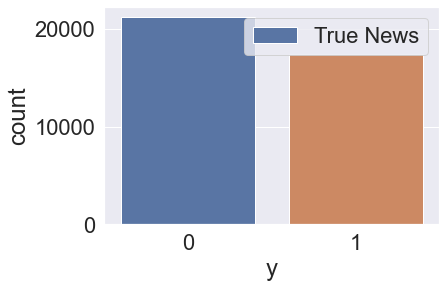

In [93]:
'''Check Class-wise Data Distribution'''

#Check Shape

#Comment on the number of rows in each section and how it may effect classificaiton

true_shape = df.loc[df['y']==0].shape
fake_shape = df.loc[df['y']==1].shape
print("True Shape: ",true_shape)
print("Fake Shape: ",fake_shape)

if true_shape > fake_shape:
    print(true_shape[0] - fake_shape[0])
else:
    print(fake_shape[0] - true_shape[0])

#Plot Frequency of each class
sns.countplot(df['y'])
new_labels = ['True Data', 'Fake Data']
plt.legend(labels=['True News', 'Fake News'])

In [94]:
"""
Conclusion: Roughly the same data size, so the sampling error would be negligable and can be ignored, 
thus no over/under sampling techenique needed.
"""

'\nConclusion: Roughly the same data size, so the sampling error would be negligable and can be ignored, \nthus no over/under sampling techenique needed.\n'

### Are certian subjects bias towards a type of news ? 

In [95]:
df['subject'].value_counts()

politicsNews       11202
worldnews           9989
News                9050
left-news           4302
politics            2358
Government News      956
Middle-east          778
US_News                5
Name: subject, dtype: int64

In [96]:
true = df[df['y']==0]
true['subject'].unique()

array(['politicsNews', 'worldnews'], dtype=object)

In [97]:
fake = df[df['y']==1]
fake['subject'].unique()

array(['News', 'politics', 'Government News', 'left-news', 'US_News',
       'Middle-east'], dtype=object)

In [98]:
# change politics to politicsNews as they are same labels 
df.subject=df.subject.replace({'politics':'politicsNews'})

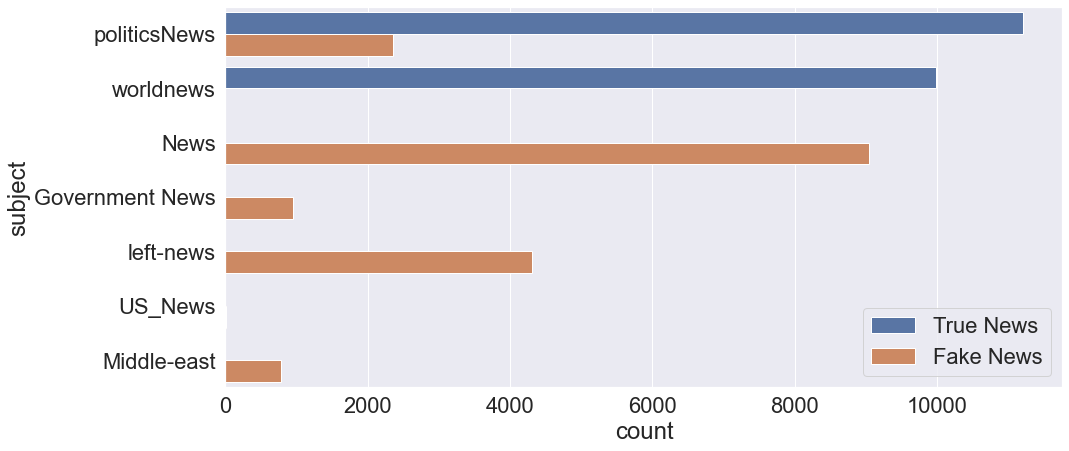

In [99]:
#Plotting out the Subject and its association with type of news
f, ax = plt.subplots(figsize=(15, 7))
sns.set_style("darkgrid")
sns.set(font_scale=2)
sns.countplot(y="subject", data=df, hue="y")
new_labels = ['True Data', 'Fake Data']
plt.legend(labels=['True News', 'Fake News'])

In [100]:
"""
Conclusion: There is no overlap of subjects between the 2 types of news, thus Subject is an 
independent variable and would not help to classify between the types of news. 

Needs to be removed later during feature processing.

"""

'\nConclusion: There is no overlap of subjects between the 2 types of news, thus Subject is an \nindependent variable and would not help to classify between the types of news. \n\nNeeds to be removed later during feature processing.\n\n'

### Is the Fake/True data related to certian time period?

In [101]:
import datetime as dt
df['year'] = pd.to_datetime(df['date']).dt.to_period('Y')
df['month'] = pd.to_datetime(df['date']).dt.to_period('m')
df['month'] = df['month'].astype(str)


In [102]:
true = df[df['y']==0]
fake = df[df['y']==1]


In [103]:
# Count occurence of each type of data in each month
df_temp_fake  = fake.groupby('month').apply(lambda x:x['y'].count()).reset_index(name='counts')
df_temp_fake

df_temp_true = true.groupby('month').apply(lambda x:x['y'].count()).reset_index(name='counts')
df_temp_true


,month,counts
0,2016-01,369
1,2016-02,383
2,2016-03,393
3,2016-04,400
4,2016-05,369
5,2016-06,381
6,2016-07,371
7,2016-08,319
8,2016-09,505
9,2016-10,375


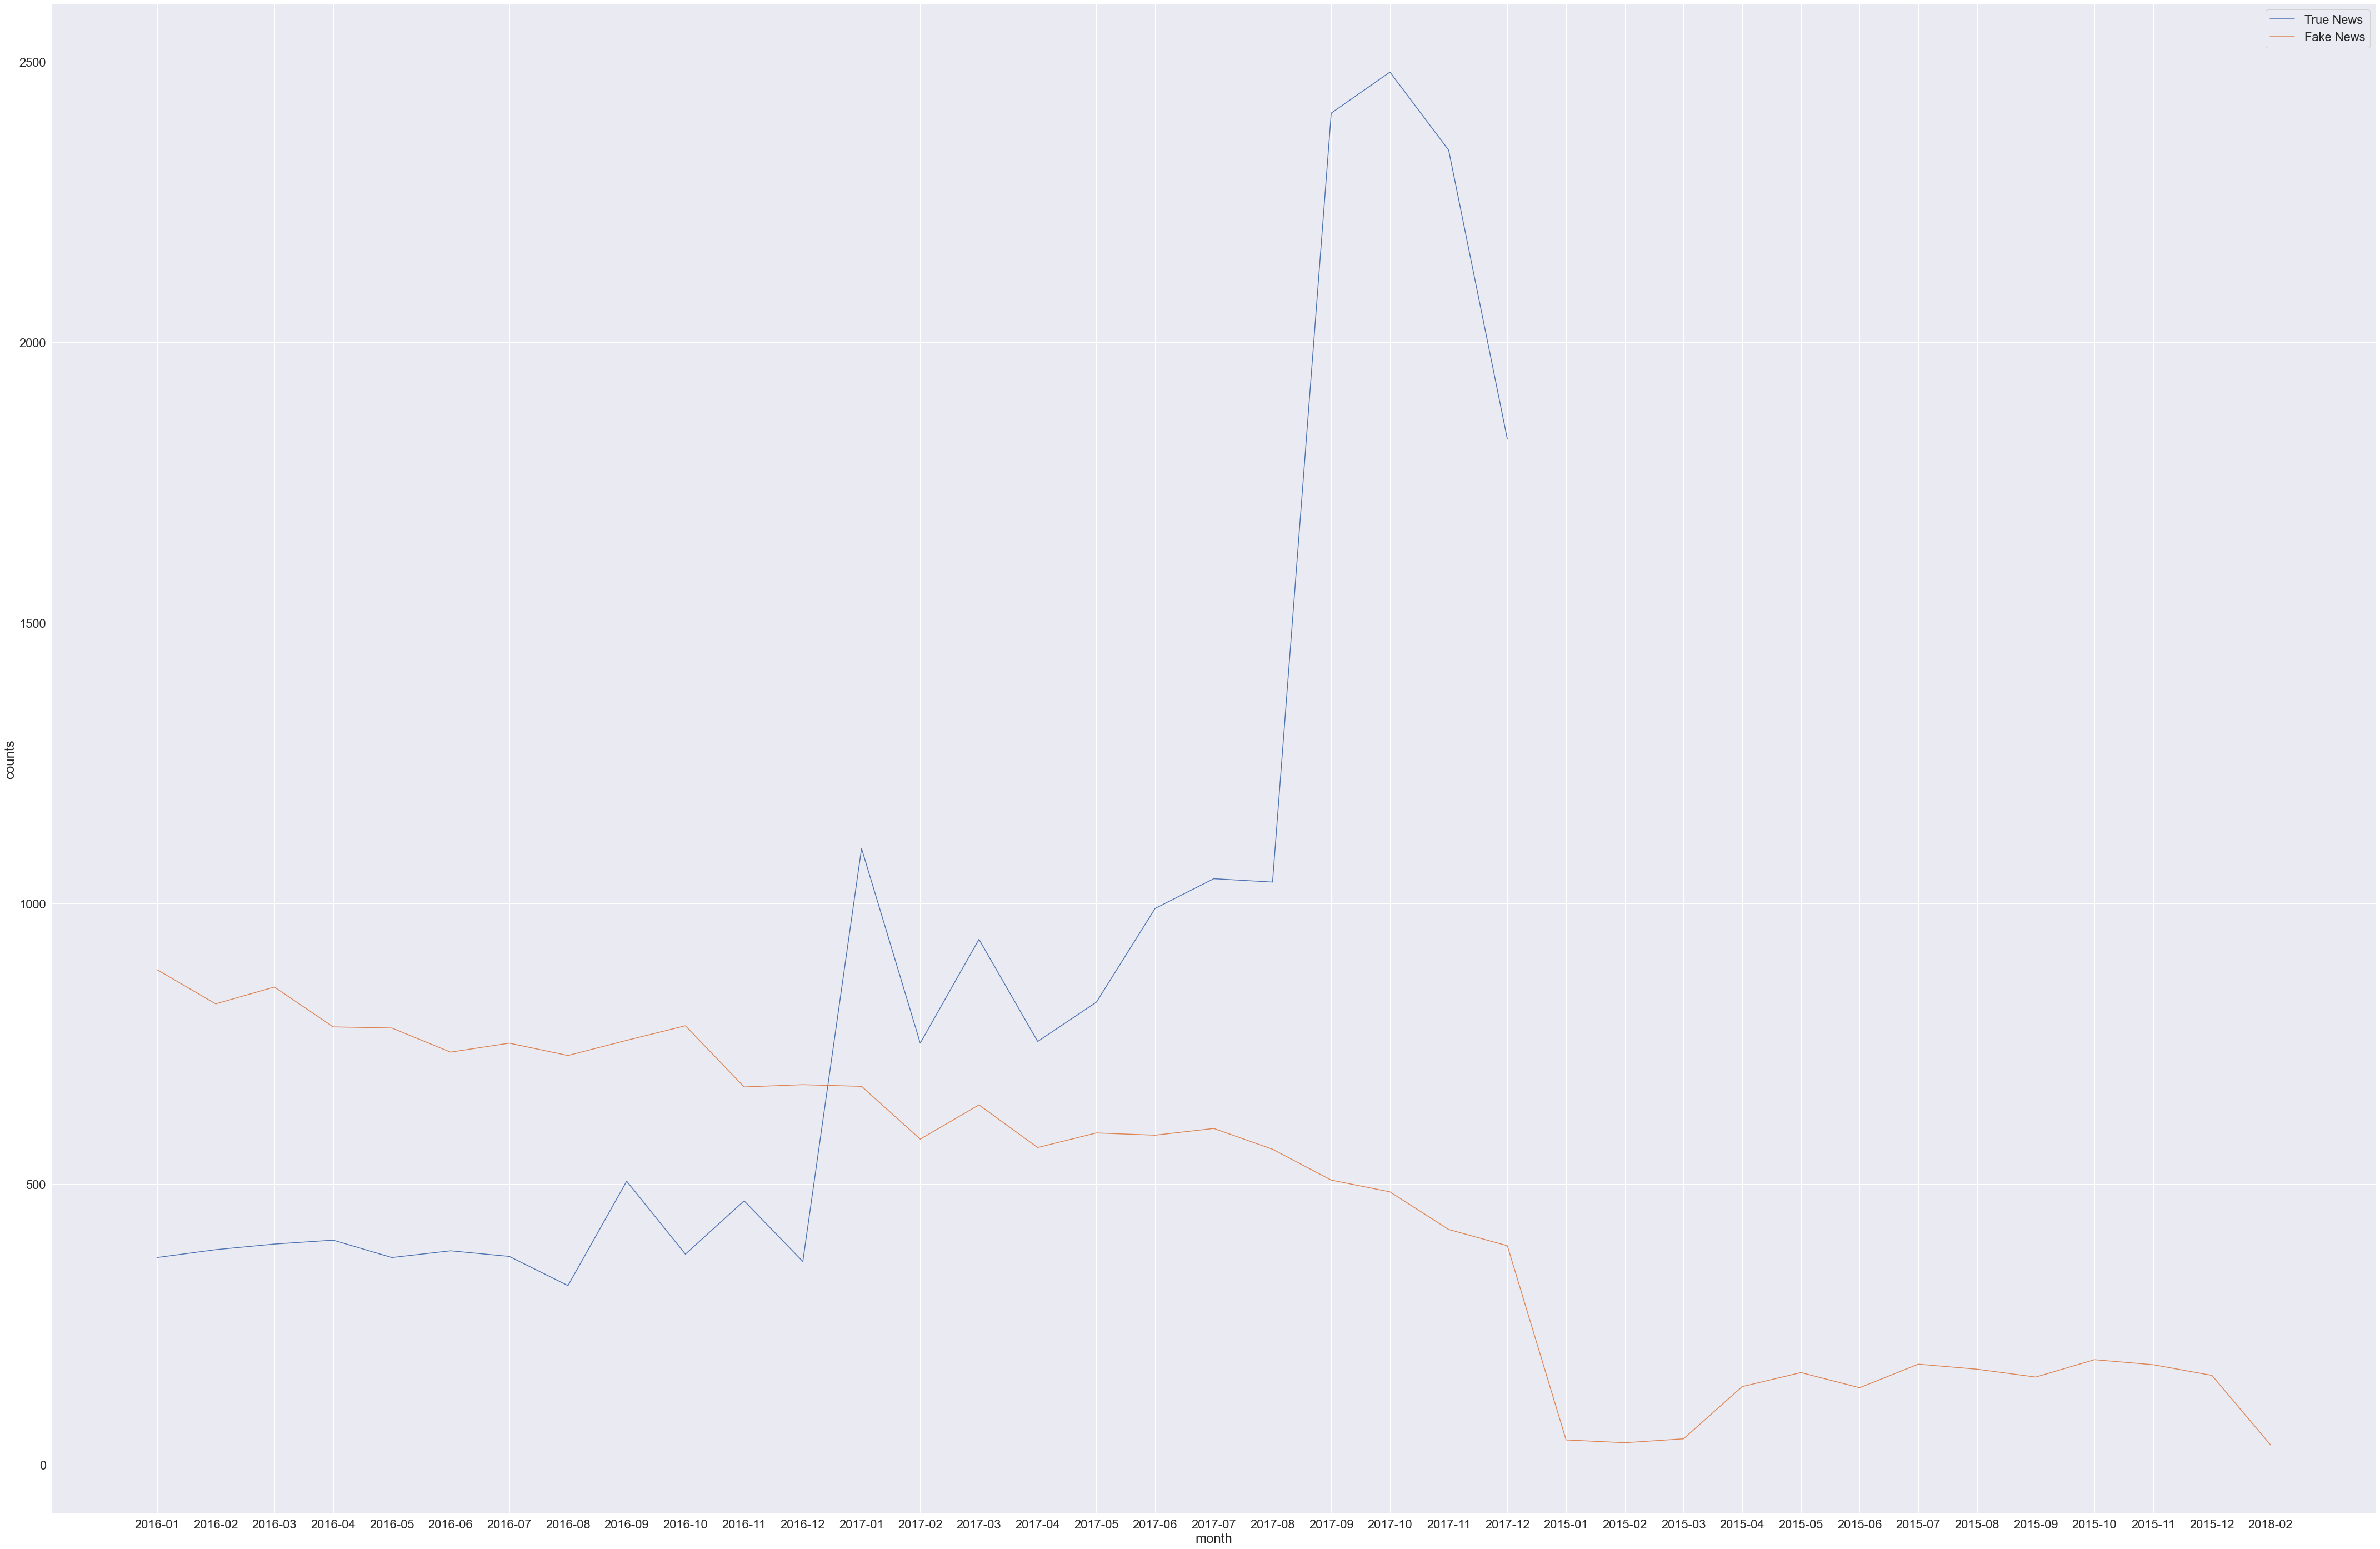

In [104]:
# Plotting count of each type of data in a month

f, ax = plt.subplots(figsize=(75, 50))
sns.set_style("darkgrid")
sns.set(font_scale=2)
sns.lineplot(x=df_temp_true['month'],y=df_temp_true['counts'], data=df_temp_true)
sns.lineplot(x=df_temp_fake['month'],y=df_temp_fake['counts'], data=df_temp_fake)
new_labels = ['True Data', 'Fake Data']
plt.legend(labels=['True News', 'Fake News'])

In [105]:
"""
Conclusion: 
- The Dataset seems to have Fake News Data covering longer duration of time when compared to True News data. 
  As can be observed when the Ture News data abruptly cuts off after a particular month. 
  This is although an intresting thing to take into account it would not affect our model training in the future.

- Fake News eventhough it stretches out for longer duration, has less count compared to True News, 
    so in the precvious analysis, the dataset appears to be nearly equally divided due to the count 
    and duration covered by each of the News Types.

"""

'\nConclusion: \n- The Dataset seems to have Fake News Data covering longer duration of time when compared to True News data. \n  As can be observed when the Ture News data abruptly cuts off after a particular month. \n  This is although an intresting thing to take into account it would not affect our model training in the future.\n\n- Fake News eventhough it stretches out for longer duration, has less count compared to True News, \n    so in the precvious analysis, the dataset appears to be nearly equally divided due to the count \n    and duration covered by each of the News Types.\n\n'

In [106]:
# Ratio of True to Fake News for each month
df_temp = pd.DataFrame()
df_temp['month'] = df_temp_true['month'].copy()
df_temp['ratio'] = (df_temp_true['counts'] / df_temp_fake['counts']) *100

df_temp

,month,ratio
0,2016-01,838.636364
1,2016-02,982.051282
2,2016-03,854.347826
3,2016-04,287.769784
4,2016-05,225.000000
5,2016-06,278.102190
6,2016-07,207.262570
7,2016-08,187.647059
8,2016-09,323.717949
9,2016-10,200.534759


<AxesSubplot:xlabel='month', ylabel='ratio'>

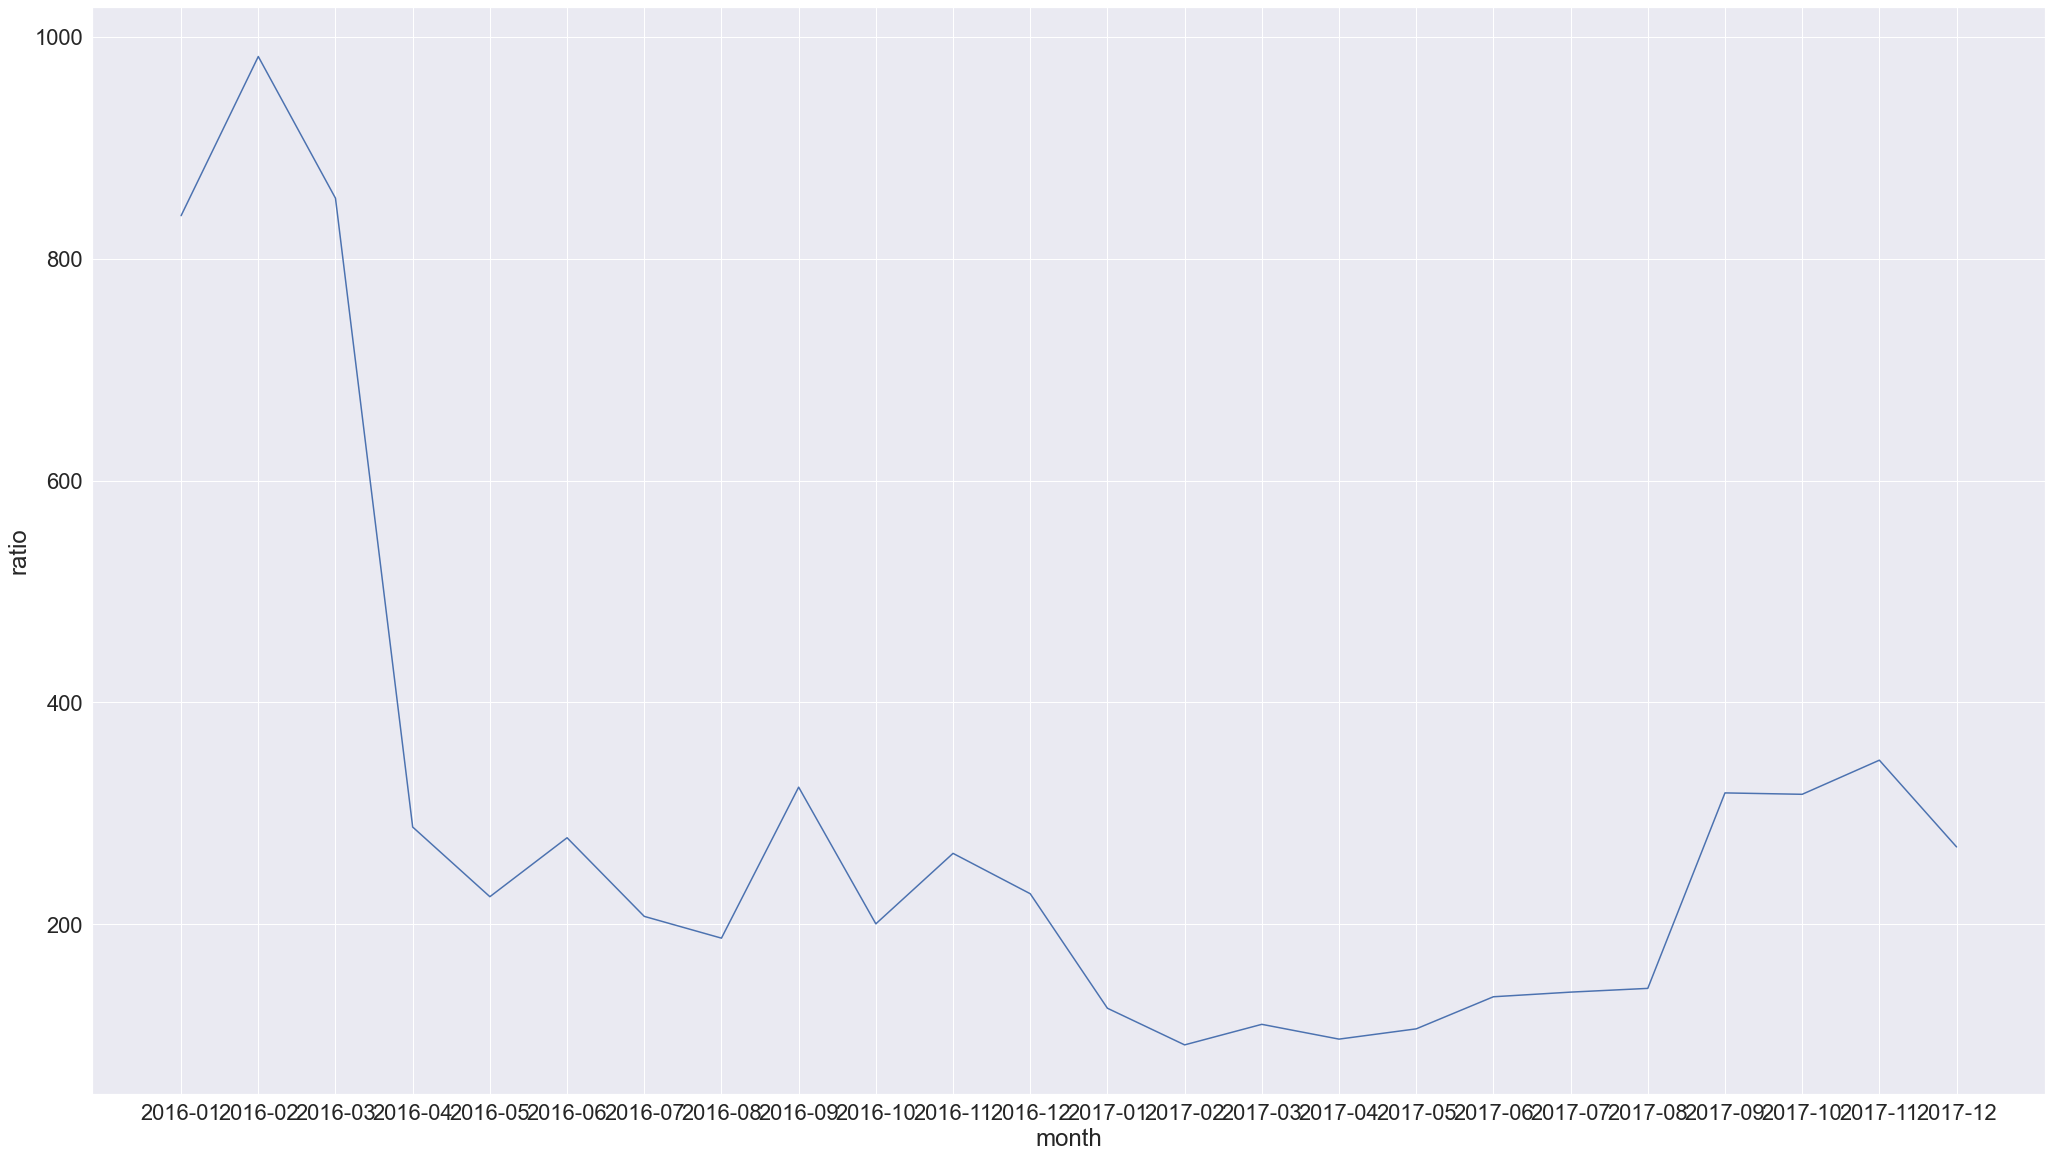

In [107]:
# Plotting count of each type of data in a month

f, ax = plt.subplots(figsize=(35, 20))
sns.set_style("darkgrid")
sns.set(font_scale=2)
sns.lineplot(x=df_temp['month'],y=df_temp['ratio'], data=df_temp_true)


In [108]:
"""
Conclusion: 
- By plotting the ratio of true/fake data the sharp decline and minor ressurgance in true data can be observed.

"""

'\nConclusion: \n- By plotting the ratio of true/fake data the sharp decline and minor ressurgance in true data can be observed.\n\n'

### Title / Text word distribution based on type of news

##### Characters

In [109]:
#Check number of characters in text , Fake v. True

true_text_len=df[df['y']==0]['text'].str.len()
fake_text_len=df[df['y']==1]['text'].str.len()


Max Value: 29781
Average Value: 2378.527157755651


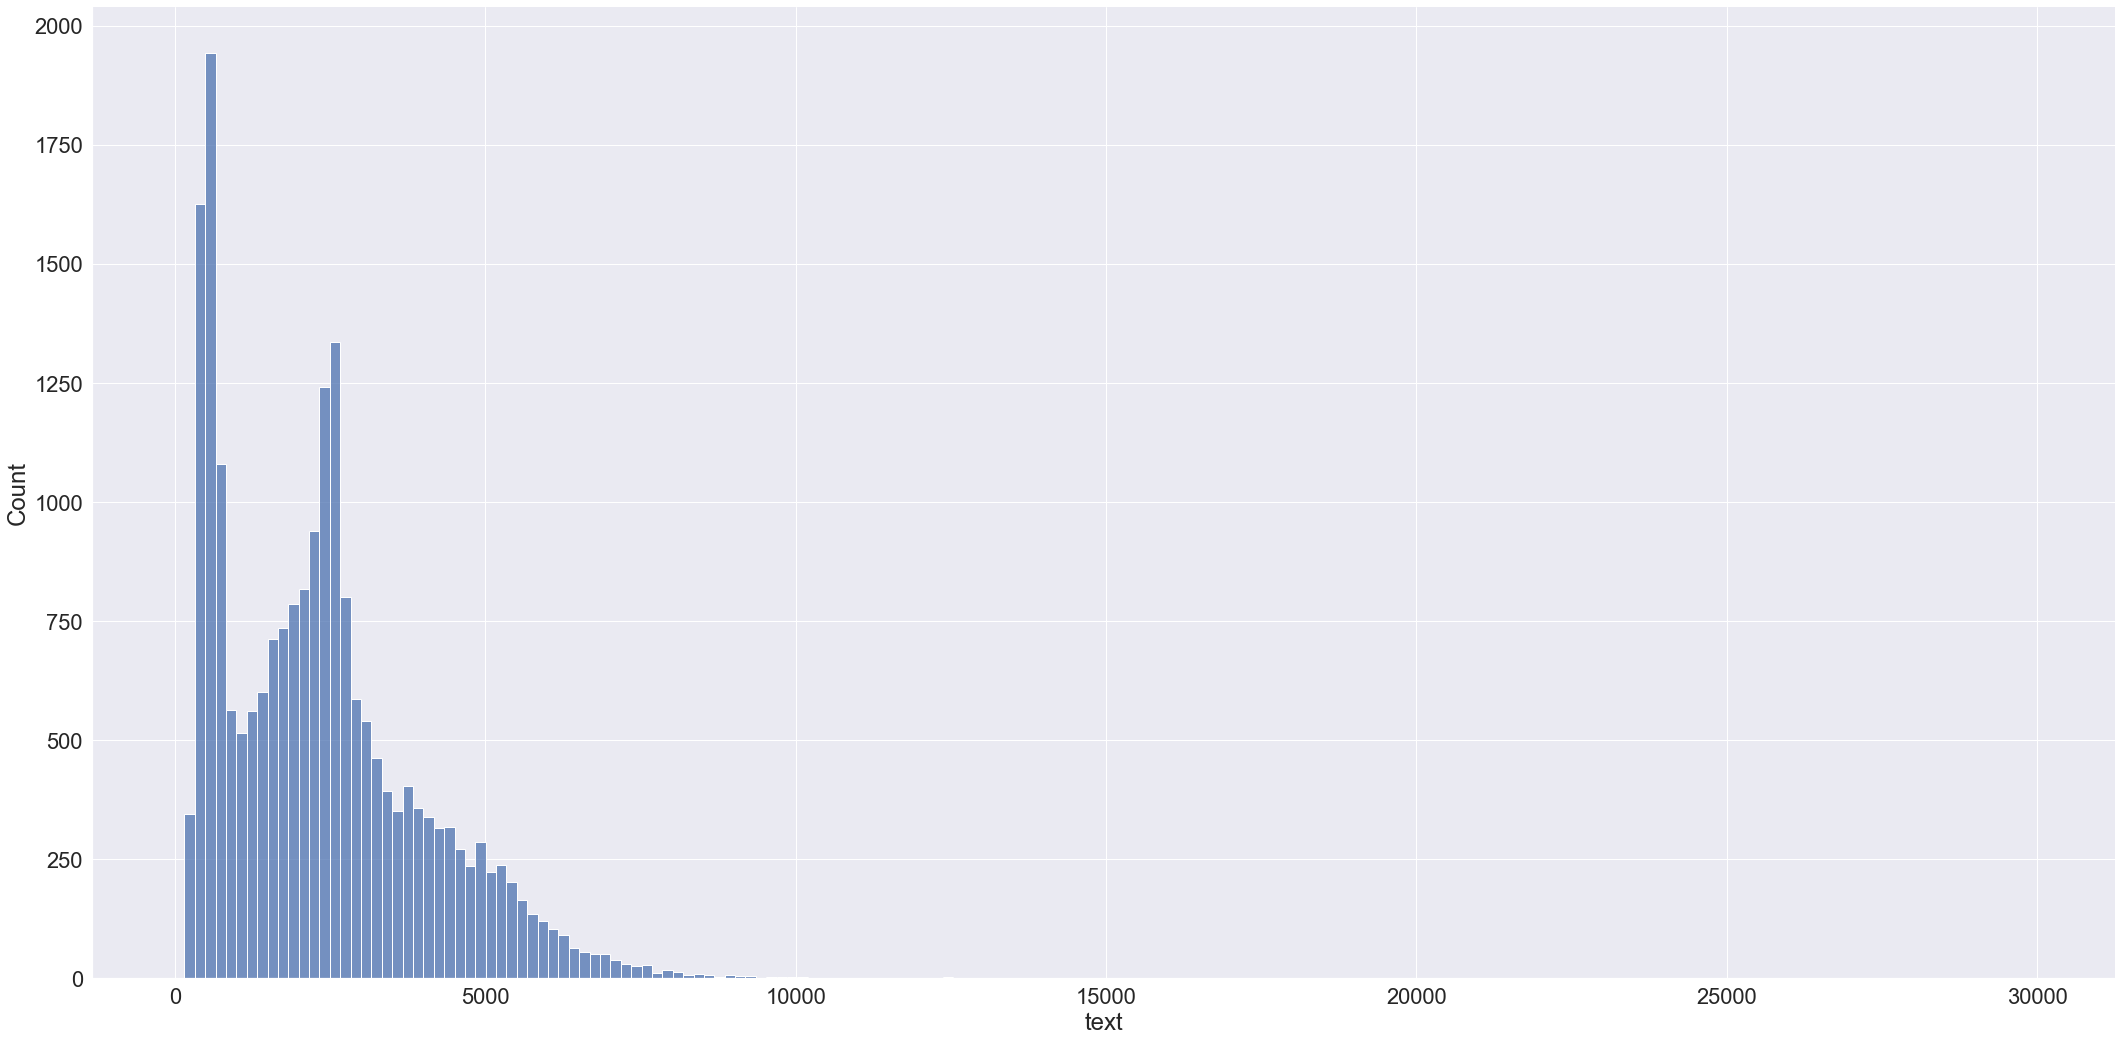

In [110]:
print("Max Value:",max(true_text_len))
print("Average Value:",statistics.mean(true_text_len))
sns.displot(true_text_len,height=15, aspect=2)

Max Value: 51794
Average Value: 2550.6207232506163


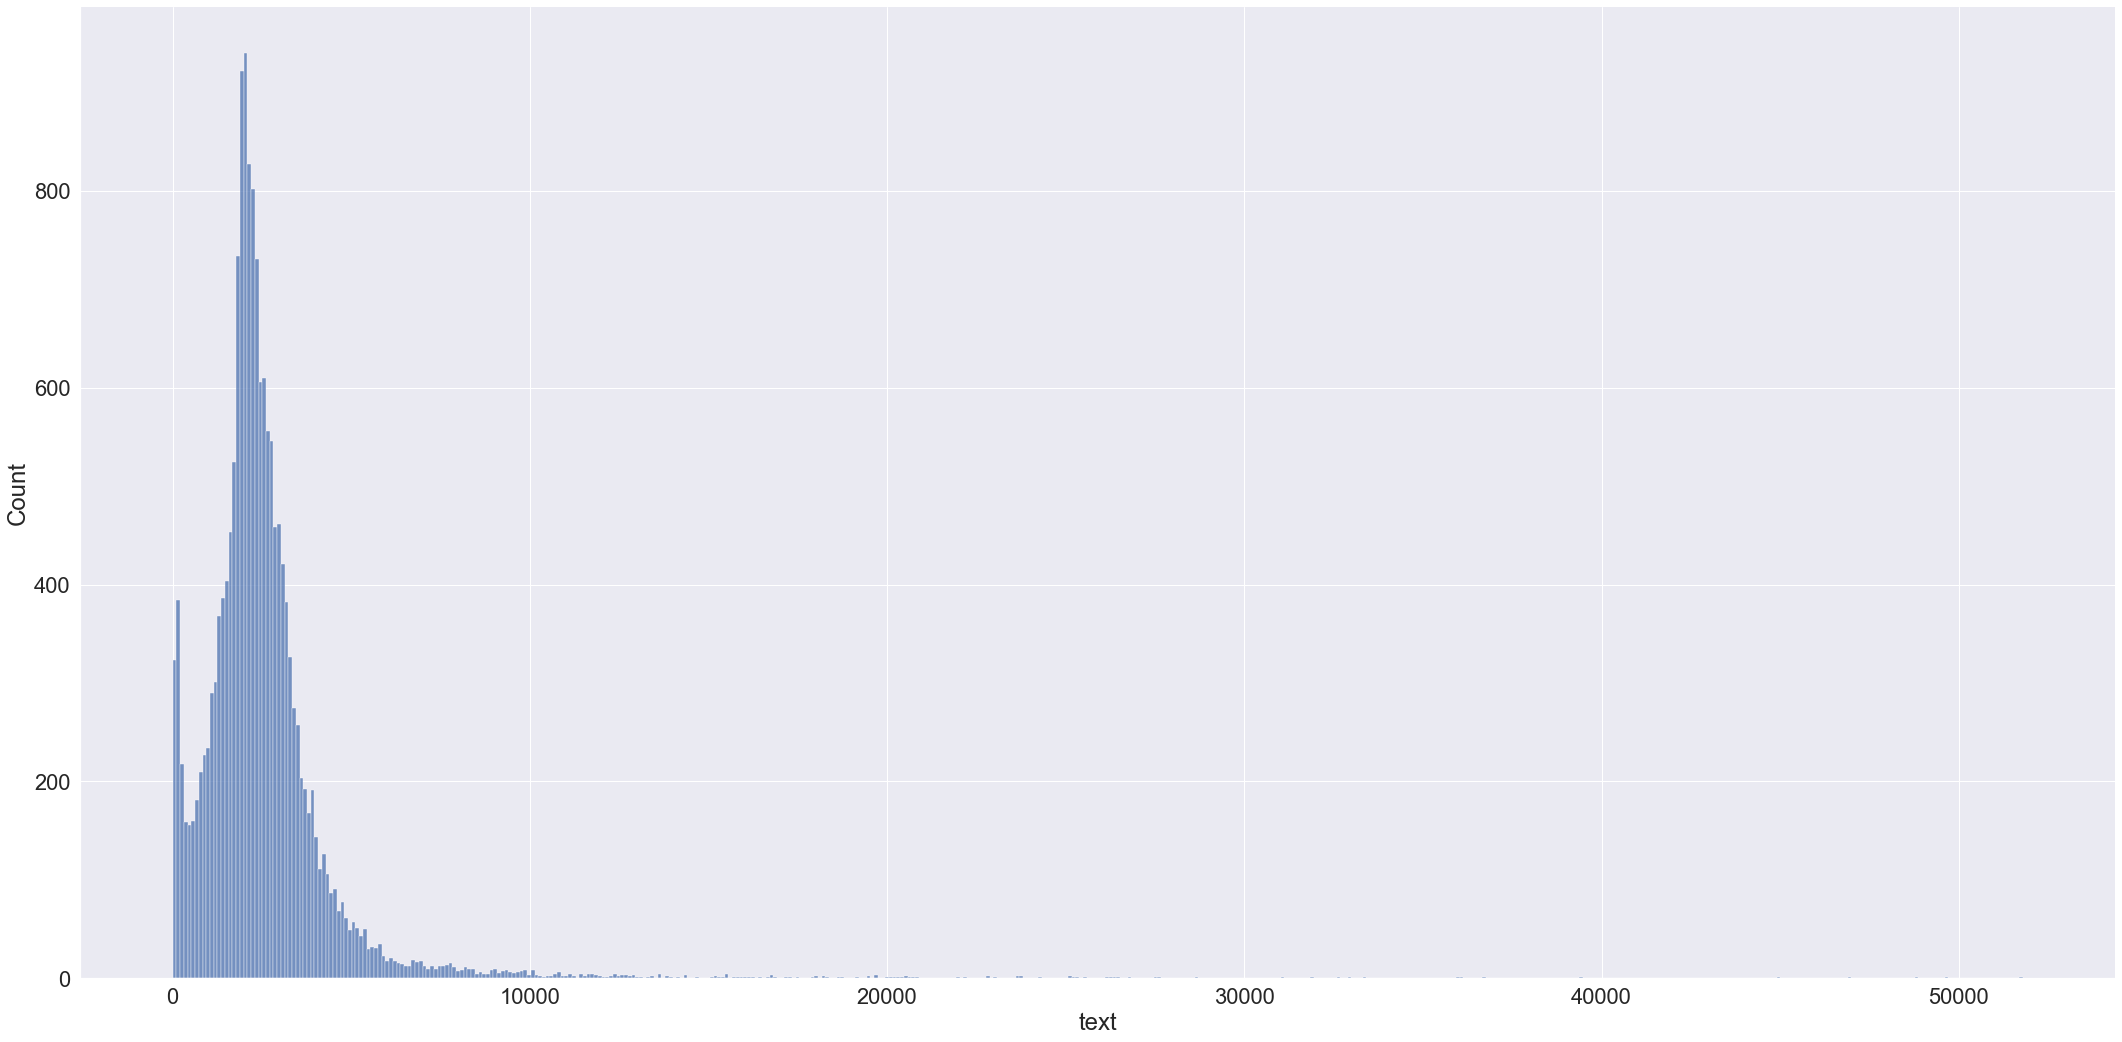

In [111]:
print("Max Value:",max(fake_text_len))
print("Average Value:",statistics.mean(fake_text_len))
sns.displot(fake_text_len,height=15, aspect=2)

In [112]:
#Check number of characters in Title , Fake v. True
true_title_len=df[df['y']==0]['title'].str.len()
fake_title_len=df[df['y']==1]['title'].str.len()


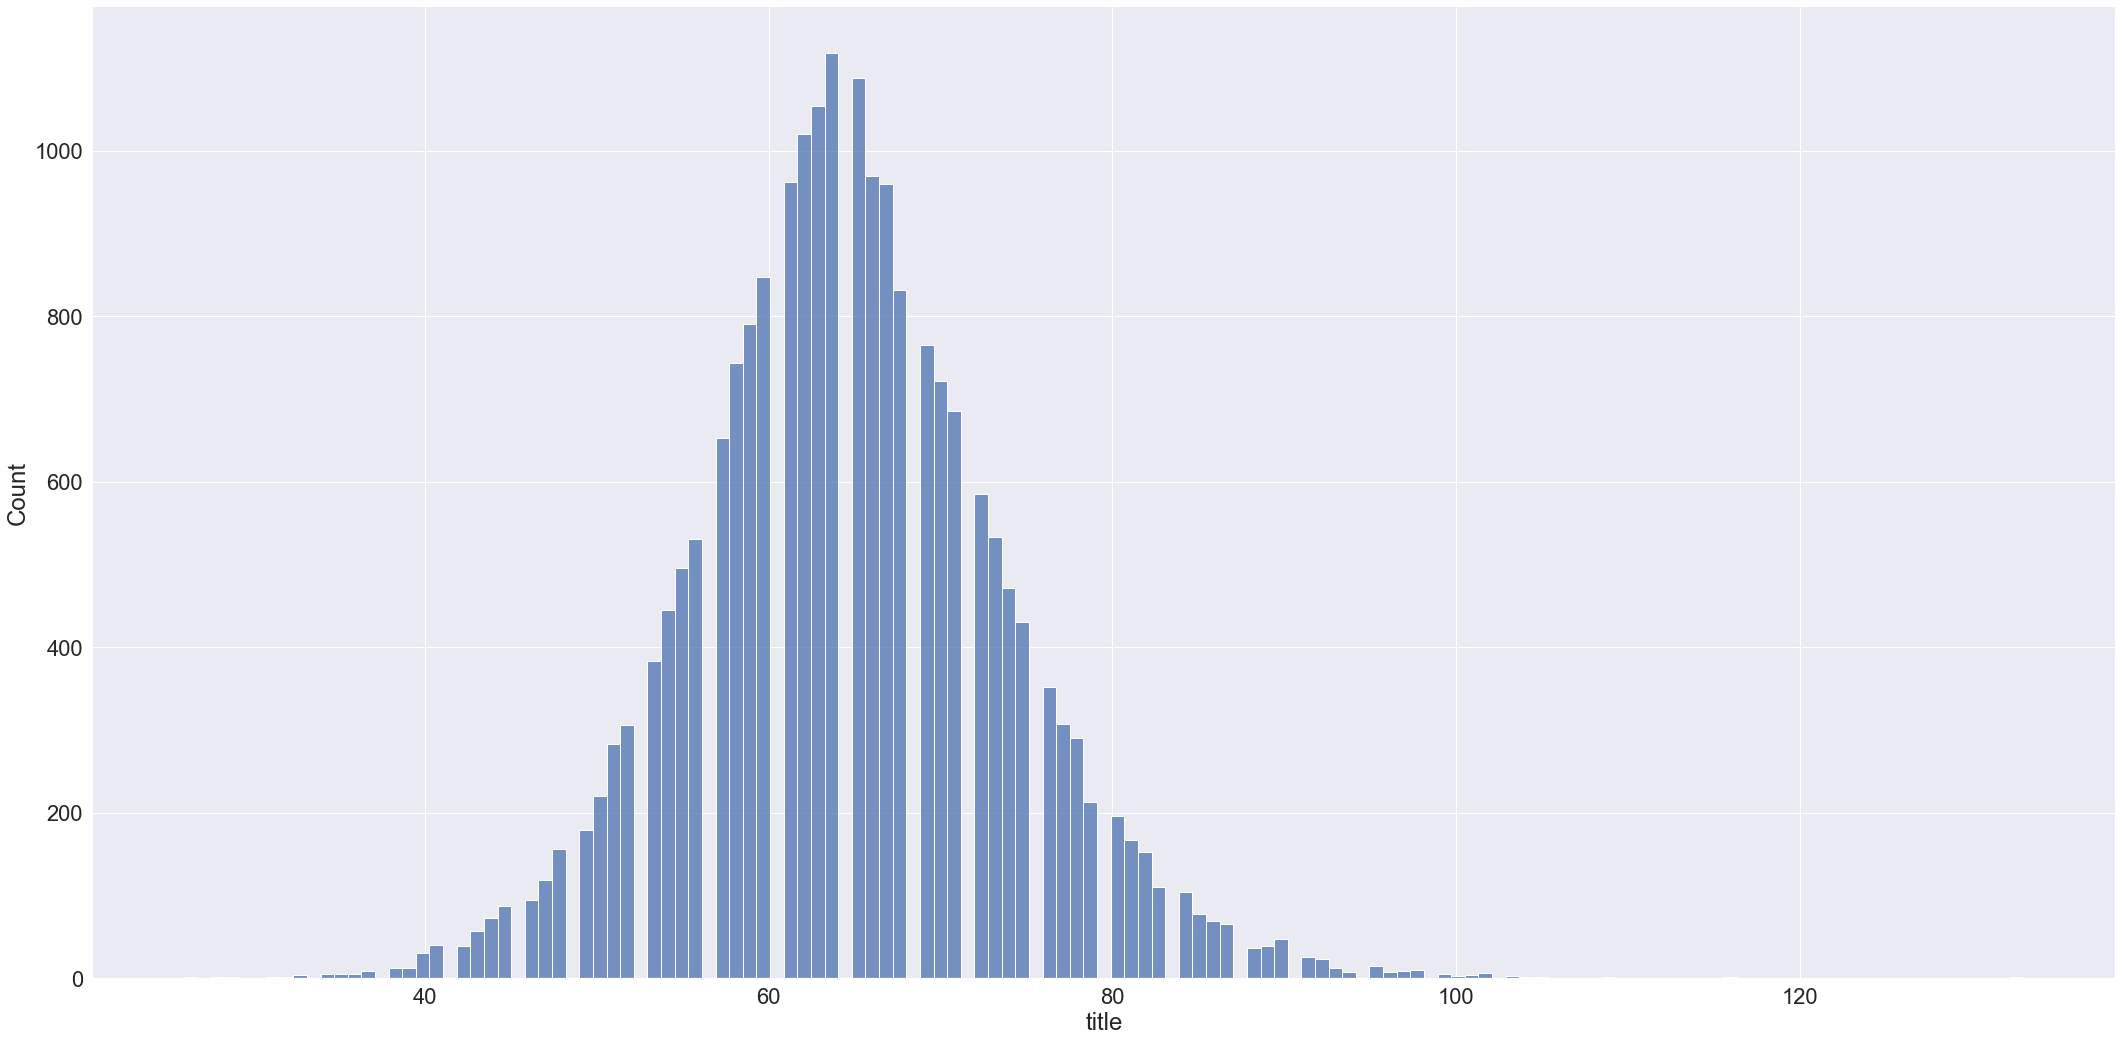

In [113]:
sns.displot(true_title_len,height=15, aspect=2)

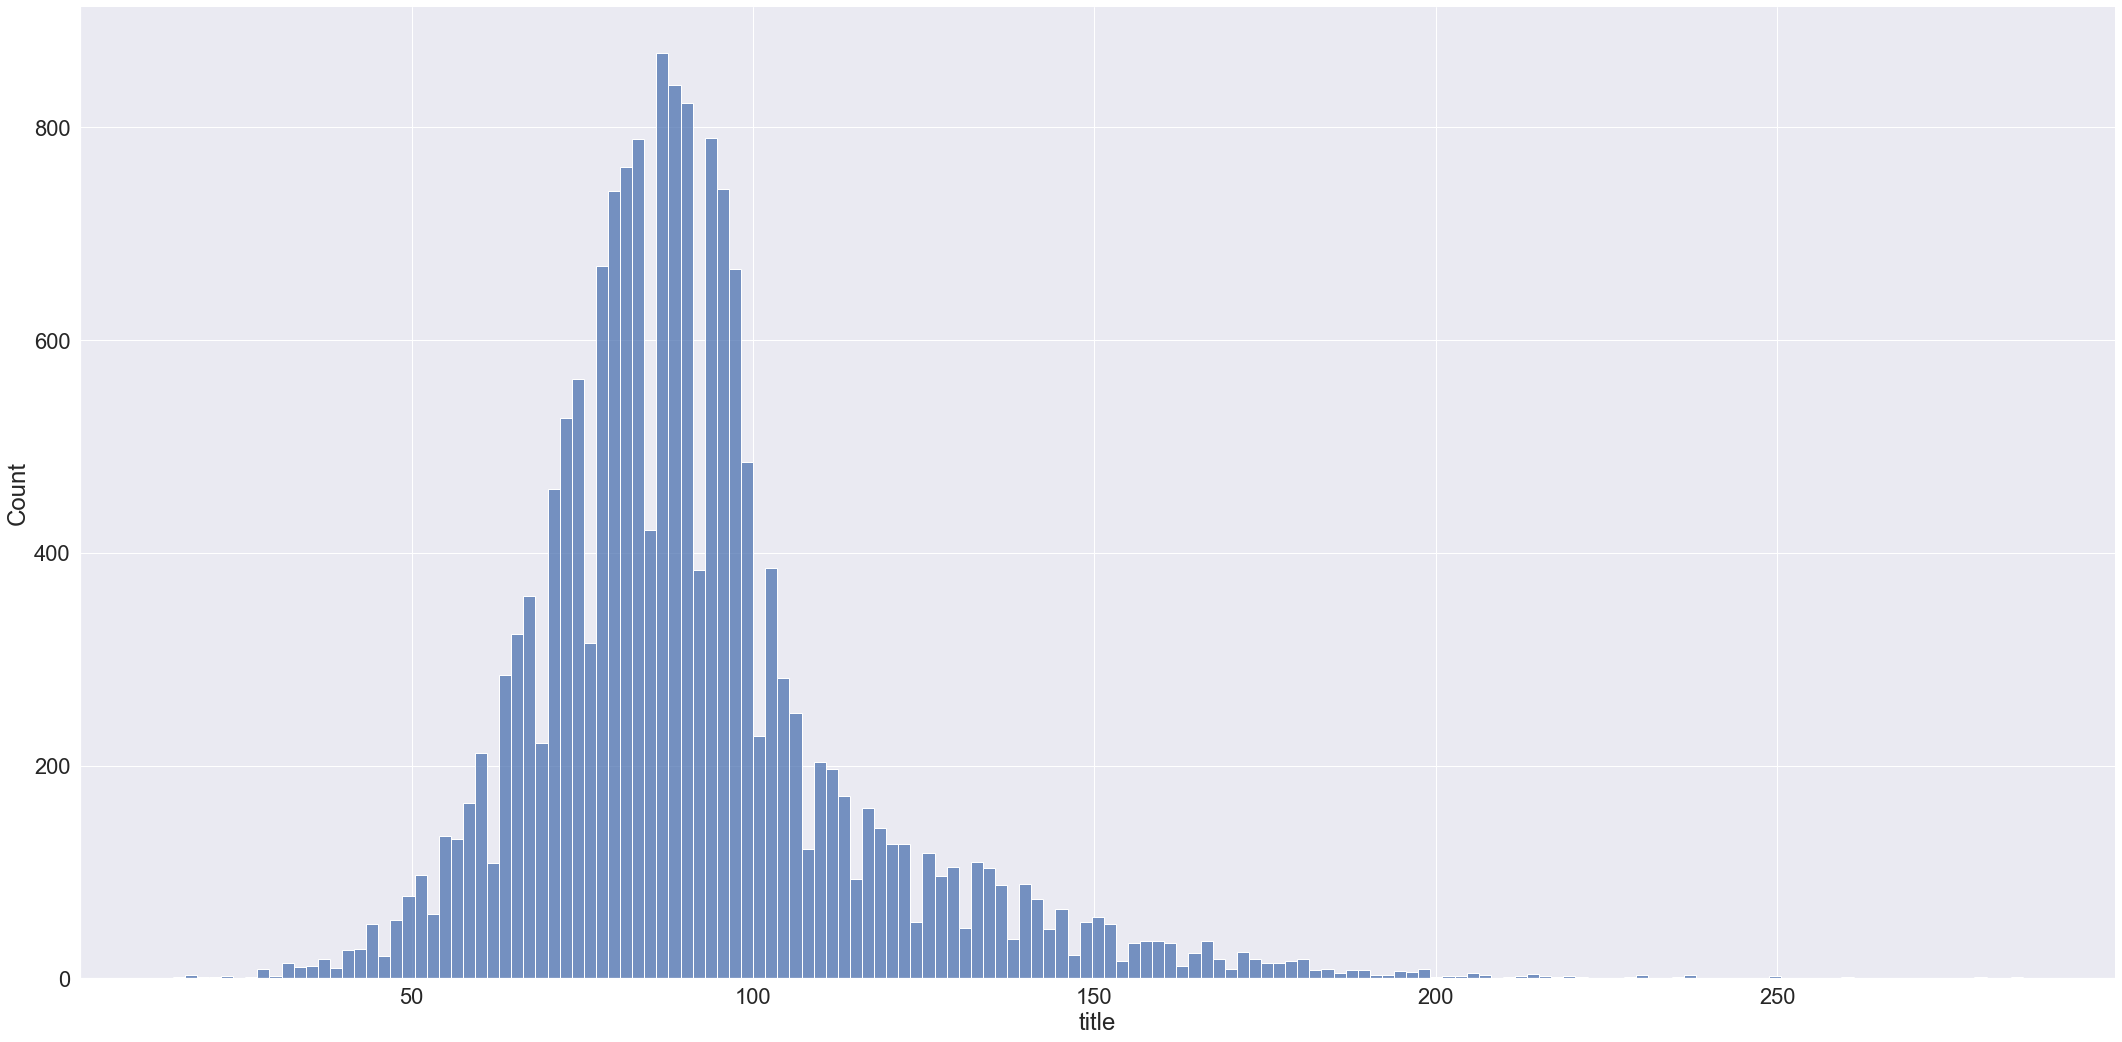

In [114]:
sns.displot(fake_title_len,height=15, aspect=2)

In [115]:
"""
Conclusion:
- The Character count distribution for Text is around the same for both True and fake news, 
    eventhought Fake news represent more of a normal distribution than true news eventhough it is skewed.
- Eventhough there are differences, nothing substantial to clearly determine difference between True and Fake News.

"""

'\nConclusion:\n- The Character count distribution for Text is around the same for both True and fake news, \n    eventhought Fake news represent more of a normal distribution than true news eventhough it is skewed.\n- Eventhough there are differences, nothing substantial to clearly determine difference between True and Fake News.\n\n'

## Data Preparation

In [116]:
"""
Steps:
- Make all text lower case
- Removing Puncutations and non-alphanumeric characters
- Remove nltk Stopwords
- Tokenize + Vectorize
- Train/Test Split
""" 

'\nSteps:\n- Make all text lower case\n- Removing Puncutations and non-alphanumeric characters\n- Remove nltk Stopwords\n- Tokenize + Vectorize\n- Train/Test Split\n'

In [117]:
df['text'] = df['title'] + " " +  df['text'] 
del df['title'], df['subject'], df['date'] , df['year'], df['month']

In [118]:
stopwords = nltk.corpus.stopwords.words('english')


df['text_pre'] = df['text']
# Make Lowercase 
df['text_pre'] = df['text_pre'].apply(lambda x : x.lower())
df['text_pre'] = df['text_pre'].apply(lambda x : x.split(" "))

# Remove Stop words
df['text_pre'] = df['text_pre'].apply(lambda x : [item for item in x if item not in stopwords])
df['text_pre'] = df['text_pre'].apply(lambda x : " ".join(x))



# Remove non-alphameric charsacters( puncutations, URLs)
df['text_pre'] = df['text_pre'].str.replace('https?:\/\/.*[\r\n]*', '')
df['text_pre'] = df['text_pre'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
df['text_pre'] = df['text_pre'].str.replace('\d+', '')
df['text_pre'] = df['text_pre'].str.replace('[^\w\s]', '')

df.head()

del df['text']


In [119]:
true = df[df['y']==0]
fake = df[df['y']==1]

In [120]:
def vectorize(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [121]:
"""
Visualizing Frequency of words in Fake and True text
It would better insight what words are most common in each corpus

"""

'\nVisualizing Frequency of words in Fake and True text\nIt would better insight what words are most common in each corpus\n\n'

<AxesSubplot:>

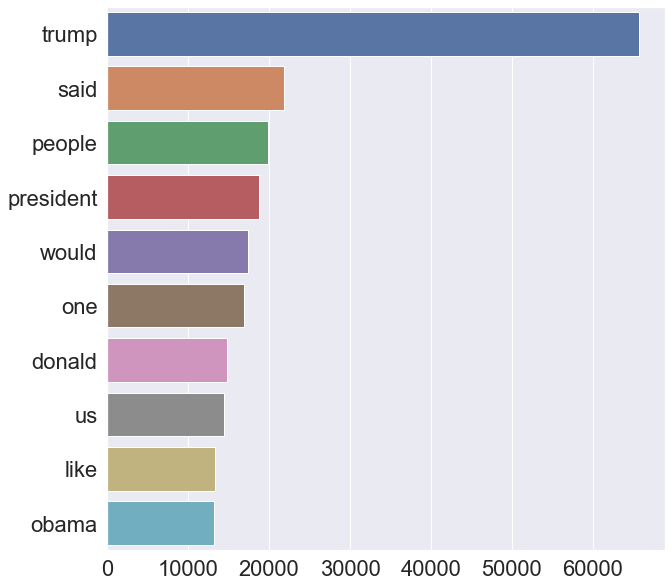

In [122]:
plt.figure(figsize = (10,10))
most_common_uni = vectorize(fake['text_pre'],10,1)
most_common_uni = dict(most_common_uni)
sns.barplot(x=list(most_common_uni.values()),y=list(most_common_uni.keys()))

<AxesSubplot:>

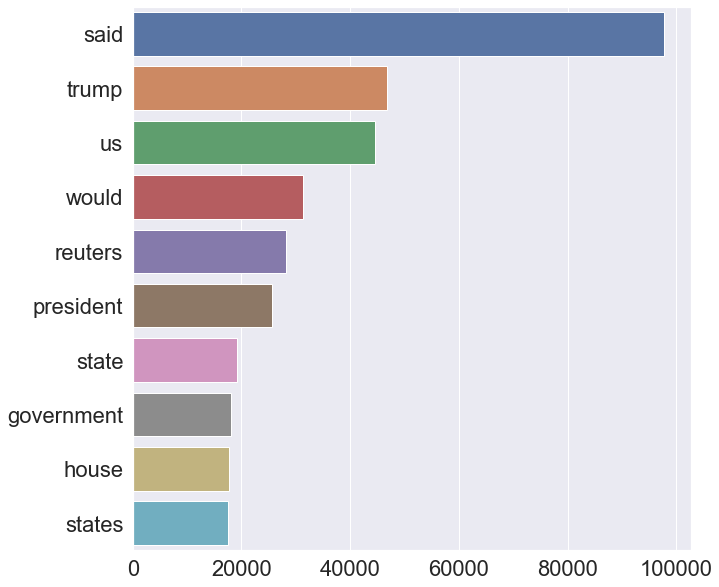

In [123]:
plt.figure(figsize = (10,10))
most_common_uni = vectorize(true['text_pre'],10,1)
most_common_uni = dict(most_common_uni)
sns.barplot(x=list(most_common_uni.values()),y=list(most_common_uni.keys()))

In [124]:
# Train Test Split
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.3)

X_train = train.drop('y', axis=1)
y_train = train['y']

X_test = test.drop('y', axis=1)
y_test = test['y']



In [125]:
#Convert to Vector

vec_train = CountVectorizer().fit(X_train['text_pre'])
X_train = vec_train.transform(X_train['text_pre'])
X_test = vec_train.transform(X_test['text_pre'])

In [126]:
X_test.shape

(11592, 161299)

In [127]:
X_train.shape

(27048, 161299)

## Model Building

In [128]:
'''
Models:
- Naive Bayes
- SVM
- Logistic Regression
'''
from sklearn.naive_bayes import MultinomialNB as naive_bayes
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [129]:
# ML Models

# Naive Bayes
Naive = naive_bayes()
Naive.fit(X_train,y_train)

predictions_NB = Naive.predict(X_test)


NB_acc = accuracy_score(predictions_NB, y_test)*100
NB_f1 = f1_score(predictions_NB, y_test)*100
print("Naive Bayes Accuracy Score -> ",NB_acc)
print("Naive Bayes F1 Score -> ",NB_f1)

Naive Bayes Accuracy Score ->  95.75569358178055
Naive Bayes F1 Score ->  95.27831094049904


In [130]:
# SVM

SVM = SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(X_train,y_train)

predictions_SVM = SVM.predict(X_test)



In [131]:
SVM_acc = accuracy_score(predictions_SVM, y_test)*100 
SVM_f1 = f1_score(predictions_SVM, y_test)*100

print("SVM Accuracy Score -> ",SVM_acc)
print("SVM F1 Score -> ",SVM_f1)

SVM Accuracy Score ->  99.50828157349896
SVM F1 Score ->  99.4554313556893


In [132]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=3)
model.fit(X_train,y_train)

predictions_LR = model.predict(X_test)

LR_acc = accuracy_score(predictions_LR, y_test)*100
LR_f1 = f1_score(predictions_LR, y_test)*100
print("Logistic Regression Accuracy Score -> ",LR_acc)
print("Logistic Regression F1 Score -> ",LR_f1)

Logistic Regression Accuracy Score ->  99.53416149068323
Logistic Regression F1 Score ->  99.48433919022155


/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/usr/local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

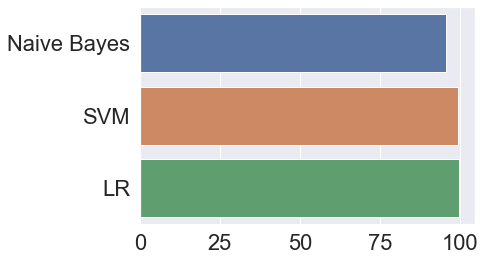

In [133]:
#Compare Accuracy
models = ['Naive Bayes', 'SVM', 'LR']
acc = [NB_acc,SVM_acc, LR_acc]

sns.barplot(acc, models)



/usr/local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

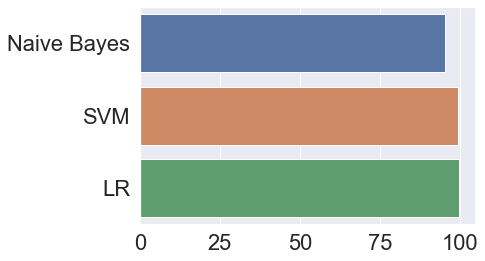

In [134]:
models = ['Naive Bayes', 'SVM', 'LR']
acc = [NB_f1,SVM_f1, LR_f1]

sns.barplot(acc, models)

In [135]:
"""
Summary:

Model - Accuracy Score - F1 Score:
- Naive Bayes          -  95.755  -  95.278
- SVM                  -  99.508  -  99.455
- Logistic Regression  -  99.534  -  99.484



Best Model: SVM 

- More state of the art models such as LSTM and Transformers can be used on the dataset as 
  these models would generalize much better to new data.
"""

'\nSummary:\n\nModel - Accuracy Score - F1 Score:\n- Naive Bayes          -  95.945\n- SVM                  -  99.551\n- Logistic Regression  -  99.516\n\n\n\nBest Model: SVM \n\n- More state of the art models such as LSTM and Transformers can be used on the dataset as \n  these models would generalize much better to new data.\n'